In [10]:
from neural_net import *
import pandas as pd
import numpy as np
import math
import time
rng = np.random.default_rng()

In [11]:
datapoints = [
    (0.0, 1.0), (0.04, 0.81), (0.08, 0.52), (0.12, 0.2), (0.17, -0.12),
    (0.21, -0.38), (0.25, -0.54), (0.29, -0.58), (0.33, -0.51), (0.38, -0.34),
    (0.42, -0.1), (0.46, 0.16), (0.5, 0.39), (0.54, 0.55), (0.58, 0.61),
    (0.62, 0.55), (0.67, 0.38), (0.71, 0.12), (0.75, -0.19), (0.79, -0.51),
    (0.83, -0.77), (0.88, -0.95), (0.92, -1.0), (0.96, -0.91), (1.0, -0.7)
]

In [12]:
tanh = np.vectorize(lambda x: (math.e ** x - math.e ** -x) / (math.e ** x + math.e ** -x))
tanh_prime = np.vectorize(lambda x: 4 / ((math.e ** x + math.e ** -x) ** 2))

In [13]:
A_weight_matrix_shapes = [(10, 1), (6, 10), (3, 6), (1, 3)]
b_weight_matrix_shapes = [(10, 1), (6, 1), (3, 1), (1, 1)]
activation_functions_and_derivatives = [[tanh, tanh_prime] for _ in range(4)]

In [14]:
neural_nets = []
for i in range(15):
    A = []
    b = []
    for shape in A_weight_matrix_shapes:
        A.append(np.matrix(rng.uniform(low=-0.2, high=0.2, size=shape)))
    for shape in b_weight_matrix_shapes:
        b.append(np.matrix(rng.uniform(low=-0.2, high=0.2, size=shape)))
    neural_nets.append(NeuralNet(A, b, activation_functions_and_derivatives, datapoints, 0.01))
    neural_nets[-1].mutation_rate = 0.05

In [15]:
def replicate_and_create_child(neural_net):
    new_mutation_rate = neural_net.mutation_rate * math.e ** (rng.uniform() / ((2 * neural_net.number_of_weights ** 0.5) ** 0.5))
    new_A_weights = []
    new_b_weights = []
    for A_weights in neural_net.A:
        new_A_weights.append(A_weights + np.matrix(new_mutation_rate * rng.uniform()))
    for b_weights in neural_net.b:
        new_b_weights.append(b_weights + np.matrix(new_mutation_rate * rng.uniform()))
    child_neural_net = NeuralNet(new_A_weights, new_b_weights, activation_functions_and_derivatives, datapoints, 0.01)
    child_neural_net.mutation_rate = new_mutation_rate
    return child_neural_net

In [16]:
def next_generation(neural_nets):
    child_neural_nets = []
    for neural_net in neural_nets:
        child_neural_nets.append(replicate_and_create_child(neural_net))
    neural_nets += child_neural_nets
    for i in range(15):
        neural_net_RSS_list = [neural_net.compute_RSS()
                               for neural_net in neural_nets]
        del neural_nets[neural_net_RSS_list.index(max(neural_net_RSS_list))]
    return neural_nets

[]

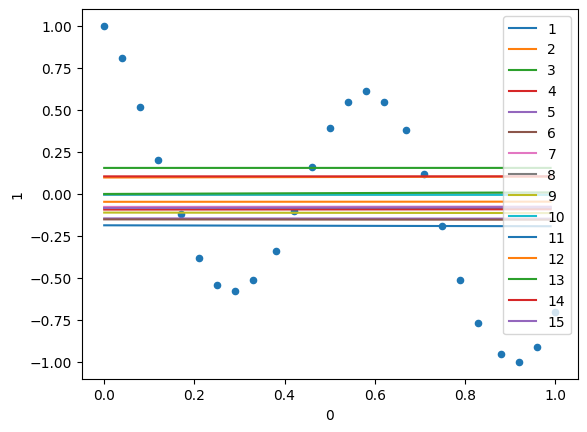

In [17]:
nn_df = pd.DataFrame([[x / 100, *[float(neural_net.predict(np.matrix(x / 100))) for neural_net in neural_nets]]
                     for x in range(100)])
datapoint_df = pd.DataFrame(datapoints)
datapoint_plot = datapoint_df.plot(x=0, y=1, kind="scatter")
for i in range(15):
    datapoint_plot = nn_df.plot(ax=datapoint_plot, x=0, y=i+1)
datapoint_plot.plot()

In [18]:
beginning = time.time()
data = [beginning, 0]

for i in range(500):
    neural_nets = next_generation(neural_nets)
    if time.time() - data[0] > 5:
        print(i + 1, 'completed;', (i - data[1]) / (time.time() - data[0]), 'per second in last interval;', (i + 1) / (time.time() - beginning), 'iter/s overall')
        data = [time.time(), i]
    print('avg RSS at generation', i + 1, sum(neural_net.compute_RSS() for neural_net in neural_nets) / 15)
    print('avg mutation rate', sum(neural_net.mutation_rate for neural_net in neural_nets) / 15)

avg RSS at generation 1 [[8.37989677]]
avg mutation rate 0.05274168634705585
avg RSS at generation 2 [[8.35192466]]
avg mutation rate 0.05438940925695586
avg RSS at generation 3 [[8.34091791]]
avg mutation rate 0.055767450551163465
4 completed; 0.49811299243581847 per second in last interval; 0.6641505514156039 iter/s overall
avg RSS at generation 4 [[8.33754592]]
avg mutation rate 0.0567672393548138
avg RSS at generation 5 [[8.33565399]]
avg mutation rate 0.05666882432746743
avg RSS at generation 6 [[8.33451781]]
avg mutation rate 0.056099463349985584
avg RSS at generation 7 [[8.33063798]]
avg mutation rate 0.05781289620617657
8 completed; 0.6631926680936767 per second in last interval; 0.6636650552449445 iter/s overall
avg RSS at generation 8 [[8.32948402]]
avg mutation rate 0.057727986904858815
avg RSS at generation 9 [[8.32948402]]
avg mutation rate 0.057727986904858815
avg RSS at generation 10 [[8.32948402]]
avg mutation rate 0.057727986904858815
avg RSS at generation 11 [[8.32948

KeyboardInterrupt: 

[]

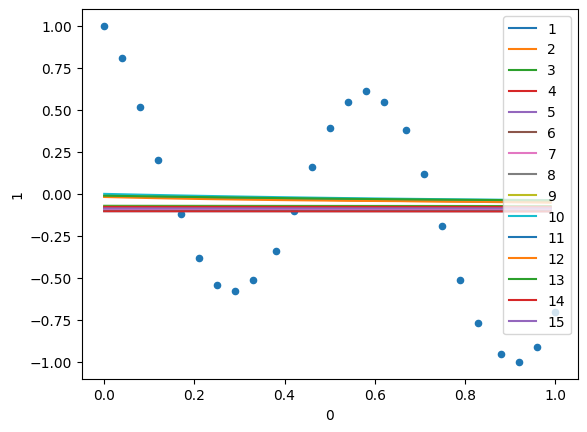

In [ ]:
nn_df = pd.DataFrame([[x / 100, *[float(neural_net.predict(np.matrix(x / 100))) for neural_net in neural_nets]]
                     for x in range(100)])
datapoint_df = pd.DataFrame(datapoints)
datapoint_plot = datapoint_df.plot(x=0, y=1, kind="scatter")
for i in range(15):
    datapoint_plot = nn_df.plot(ax=datapoint_plot, x=0, y=i+1)
datapoint_plot.plot()
